In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
%matplotlib notebook

In [14]:
hbar = 1.0          # Reduced Planck constant
m = 1.0             # Electron mass
e = 1.0             # Elementary charge

In [15]:
barrier_start = 8.0
barrier_end = 12.0  
barrier_width = barrier_end - barrier_start
x=np.linspace(0, 20, 1000)
V0 = 0.5
V = np.zeros_like(x)
barrier_mask = (x >= barrier_start) & (x <= barrier_end)
V[barrier_mask] = V0
plt.plot(x, V, 'r-', linewidth=2, label=f'Barrier Height = {V0}')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.grid(True)
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

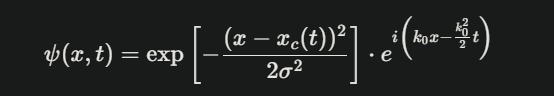

In [16]:
def psi(x, t, k0, sigma, x0):
    x_center = x0 + k0 * t
    envelope = np.exp(-(x - x_center)**2 / (2 * sigma**2))
    phase = np.exp(1j * (k0 * x - (k0**2) * t / 2))
    return envelope * phase

In [17]:
x = np.linspace(-10, 10, 1000)


k0 = 5.0
sigma = 0.5
x0 = -5.0

steps = 200


fig1, ax1 = plt.subplots()
line_real, = ax1.plot([], [], label='Re[$\\psi$]', lw=2)
line_imag, = ax1.plot([], [], label='Im[$\\psi$]', lw=2)
line_env, = ax1.plot([], [], 'r--', label='Envelope')
ax1.set_xlim(10, -10)
ax1.set_ylim(-1.1, 1.1)
ax1.set_xlabel('x')
ax1.set_ylabel('$\\psi$(x)')
ax1.set_title('1D Gaussian Wave Packet Moving')
ax1.legend()

def init():
    line_real.set_data([], [])
    line_imag.set_data([], [])
    line_env.set_data([], [])
    return line_real, line_imag, line_env

def animate(i):
    t = i * dt
    wave = psi(x, t, k0, sigma, x0)
    line_real.set_data(x, np.real(wave))
    line_imag.set_data(x, np.imag(wave))
    line_env.set_data(x, abs(wave))
    
    return line_real, line_imag, line_env

anim = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=steps, interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>

In [18]:
dx=0.01
t=10
dt=0.01
time=np.linspace(0,t,1000)
N=len(V)
r = hbar * dt / (4 * m * dx**2)
s = dt / (2 * hbar) * V  # potential term array

# Diagonals for A
diag_A = 1 + 2j * r + 1j * s
off_diag_A = -1j * r * np.ones(N-1)

# Diagonals for B
diag_B = 1 - 2j * r - 1j * s
off_diag_B = 1j * r * np.ones(N-1)

# Construct sparse matrices A and B using tridiagonal storage
A = diags([off_diag_A, diag_A, off_diag_A], offsets=[-1, 0, 1],format='csr')
B = diags([off_diag_B, diag_B, off_diag_B], offsets=[-1, 0, 1],format='csr')

In [19]:
x = np.linspace(-10, 10, 1000)
k0 = 5.0
sigma = 0.5
x0 = -5.0
psi_t=psi(x, 0, k0, sigma, x0)
wave=[]
for i in range(1, len(time)):
    b = B.dot(psi_t)
    psi_t = spsolve(A, b)
    wave.append(psi_t)

In [ ]:
def init():
    line_real.set_data([], [])
    line_imag.set_data([], [])
    line_env.set_data([], [])
    return line_real, line_imag, line_env

def animate(i):
    t = i * dt
    wave = wave[i]
    line_real.set_data(x, np.real(wave))
    line_imag.set_data(x, np.imag(wave))
    line_env.set_data(x, abs(wave))
    
    return line_real, line_imag, line_env

anim = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=steps, interval=50, blit=True)

plt.show()